In [1]:
import numpy as np
from matplotlib import pyplot as plt
from rich.console import Console
from rich.table import Table

## Question 1

In [2]:
# Define MDP components
states = ['H', 'A', 'C']
actions = ['attend_class', 'eat_food']
rewards = {'H': -1, 'A': 3, 'C': 1}

# Define transition probabilities for each action from each state
transition_probs = {
    'H': {
        'attend_class': {'A': 0.5, 'H': 0.5},
        'eat_food': {'C': 1.0}
    },
    'A': {
        'attend_class': {'A': 0.7, 'C': 0.3},
        'eat_food': {'C': 0.8, 'A': 0.2}
    },
    'C': {
        'attend_class': {'A': 0.6, 'H': 0.3, 'C': 0.1},
        'eat_food': {'C': 1.0}
    }
}

gamma = 0.9  # Discount factor

# Initialize Value Function
V = {s: 0 for s in states}

def value_iteration():
    global V
    theta = 1e-6  # Convergence threshold
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max(sum(transition_probs[s][a][s_prime] * (rewards[s_prime] + gamma * V[s_prime])
                           for s_prime in transition_probs[s][a]) for a in actions)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

def policy_iteration():
    policy = {s: actions[0] for s in states}  # Initialize arbitrary policy

    def one_step_lookahead(s, V):
        return {a: sum(transition_probs[s][a][s_prime] * (rewards[s_prime] + gamma * V[s_prime])
                       for s_prime in transition_probs[s][a]) for a in actions}

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in states:
                v = V[s]
                V[s] = sum(transition_probs[s][policy[s]][s_prime] * (rewards[s_prime] + gamma * V[s_prime])
                           for s_prime in transition_probs[s][policy[s]])
                delta = max(delta, abs(v - V[s]))
            if delta < 1e-6:
                break

        # Policy Improvement
        policy_stable = True
        for s in states:
            chosen_action = policy[s]
            action_values = one_step_lookahead(s, V)
            best_action = max(action_values, key=action_values.get)

            if chosen_action != best_action:
                policy_stable = False
            policy[s] = best_action

        if policy_stable:
            break
    return policy, V

console = Console()

# Perform value iteration
optimal_values = value_iteration()

# Perform policy iteration
optimal_policy, optimal_values_policy = policy_iteration()

# Create tables for printing results
value_table = Table(title="Optimal Values from Value Iteration")
value_table.add_column("State", justify="center", style="cyan", no_wrap=True)
value_table.add_column("Value", justify="center", style="bright_green")

for s in states:
    value_table.add_row(s, f"{optimal_values[s]:.2f}")

policy_table = Table(title="Optimal Policy from Policy Iteration")
policy_table.add_column("State", justify="center", style="cyan", no_wrap=True)
policy_table.add_column("Action", justify="center", style="bright_green")

for s in states:
    policy_table.add_row(s, optimal_policy[s])

value_table_policy = Table(title="Optimal Values from Policy Iteration")
value_table_policy.add_column("State", justify="center", style="cyan", no_wrap=True)
value_table_policy.add_column("Value", justify="center", style="bright_green")

for s in states:
    value_table_policy.add_row(s, f"{optimal_values_policy[s]:.2f}")

# Print tables
console.print(value_table)
console.print(policy_table)
console.print(value_table_policy)

 Optimal Values  
   from Value    
    Iteration    
┏━━━━━━━┳━━━━━━━┓
┃ State ┃ Value ┃
┡━━━━━━━╇━━━━━━━┩
│   H   │ 18.95 │
│   A   │ 20.94 │
│   C   │ 19.81 │
└───────┴───────┘

  Optimal Policy from   
    Policy Iteration    
┏━━━━━━━┳━━━━━━━━━━━━━━┓
┃ State ┃    Action    ┃
┡━━━━━━━╇━━━━━━━━━━━━━━┩
│   H   │ attend_class │
│   A   │ attend_class │
│   C   │ attend_class │
└───────┴──────────────┘

 Optimal Values  
   from Policy   
    Iteration    
┏━━━━━━━┳━━━━━━━┓
┃ State ┃ Value ┃
┡━━━━━━━╇━━━━━━━┩
│   H   │ 18.95 │
│   A   │ 20.94 │
│   C   │ 19.81 │
└───────┴───────┘

## Question 2

Value Function from Value Iteration:
[[ 3.138  2.824  2.542  2.288  2.059  0.     9.    10.    10.   ]
 [ 3.487  3.138  2.824  2.542  2.288  0.     8.1    9.    10.   ]
 [ 3.874  3.487  3.138  2.824  2.542  0.     7.29   8.1    9.   ]
 [ 4.305  3.874  3.487  3.138  2.824  0.     0.     0.     0.   ]
 [ 4.783  4.305  3.874  3.487  3.138  2.824  2.542  2.288  2.059]
 [ 5.314  0.     0.     0.     3.487  3.138  2.824  2.542  2.288]
 [ 5.905  6.561  5.905  0.     3.874  3.487  3.138  2.824  2.542]
 [ 5.314  5.905  6.561  0.     4.305  3.874  3.487  3.138  2.824]
 [ 4.783  5.314  5.905  5.314  4.783  4.305  3.874  3.487  3.138]]


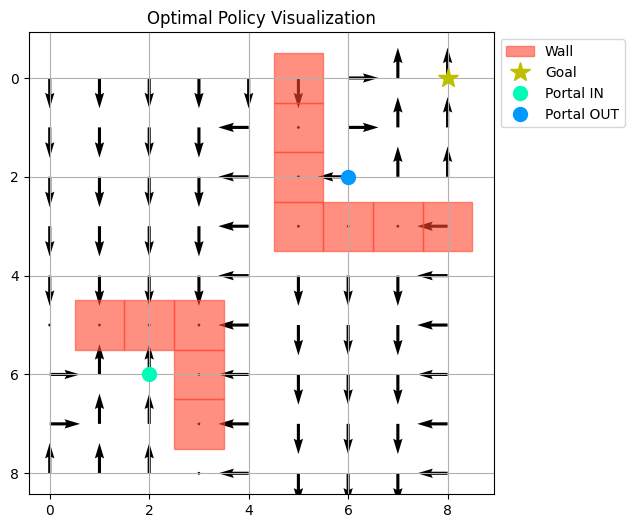

Value Function from Policy Iteration:
[[ 3.138  2.824  2.542  2.288  2.059  0.     9.    10.    10.   ]
 [ 3.487  3.138  2.824  2.542  2.288  0.     8.1    9.    10.   ]
 [ 3.874  3.487  3.138  2.824  2.542  0.     7.29   8.1    9.   ]
 [ 4.305  3.874  3.487  3.138  2.824  0.     0.     0.     0.   ]
 [ 4.783  4.305  3.874  3.487  3.138  2.824  2.542  2.288  2.059]
 [ 5.314  0.     0.     0.     3.487  3.138  2.824  2.542  2.288]
 [ 5.905  6.561  5.905  0.     3.874  3.487  3.138  2.824  2.542]
 [ 5.314  5.905  6.561  0.     4.305  3.874  3.487  3.138  2.824]
 [ 4.783  5.314  5.905  5.314  4.783  4.305  3.874  3.487  3.138]]


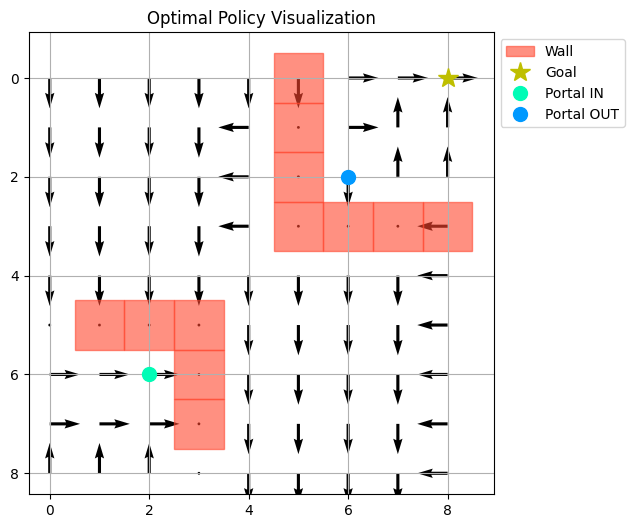

In [3]:
# Define the grid size
GRID_SIZE = 9

# Define actions
ACTIONS = ["up", "down", "left", "right"]
ACTION_VECTORS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1),
}

def initialize_environment(walls, goal, portal_in, portal_out):
    rewards = np.zeros((GRID_SIZE, GRID_SIZE))
    is_wall = np.zeros((GRID_SIZE, GRID_SIZE), dtype=bool)
    
    # Set walls
    for wall in walls:
        is_wall[wall] = True
    
    # Set goal reward
    rewards[goal] = 1
    
    return rewards, is_wall, portal_in, portal_out

def get_next_state(state, action, is_wall, portal_in, portal_out):
    x, y = state
    dx, dy = ACTION_VECTORS[action]
    next_x, next_y = x + dx, y + dy
    
    # Check if next state is within grid and not a wall
    if 0 <= next_x < GRID_SIZE and 0 <= next_y < GRID_SIZE and not is_wall[next_x, next_y]:
        # Check if next state is portal entrance
        if (next_x, next_y) == portal_in:
            return portal_out
        return (next_x, next_y)
    return state

def value_iteration(rewards, is_wall, portal_in, portal_out, gamma=0.9, theta=1e-6):
    V = np.zeros((GRID_SIZE, GRID_SIZE))
    policy = np.empty((GRID_SIZE, GRID_SIZE), dtype=object)

    while True:
        delta = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if is_wall[x, y]:
                    continue
                v = V[x, y]
                action_values = []
                for action in ACTIONS:
                    next_state = get_next_state((x, y), action, is_wall, portal_in, portal_out)
                    action_values.append(rewards[next_state] + gamma * V[next_state])
                new_v = max(action_values)
                policy[x, y] = ACTIONS[np.argmax(action_values)]
                delta = max(delta, abs(v - new_v))
                V[x, y] = new_v
        if delta < theta:
            break
    
    return V, policy

def policy_iteration(rewards, is_wall, portal_in, portal_out, gamma=0.9):
    policy = np.random.choice(ACTIONS, size=(GRID_SIZE, GRID_SIZE))
    V = np.zeros((GRID_SIZE, GRID_SIZE))

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for x in range(GRID_SIZE):
                for y in range(GRID_SIZE):
                    if is_wall[x, y]:
                        continue
                    v = V[x, y]
                    next_state = get_next_state((x, y), policy[x, y], is_wall, portal_in, portal_out)
                    V[x, y] = rewards[next_state] + gamma * V[next_state]
                    delta = max(delta, abs(v - V[x, y]))
            if delta < 1e-8:
                break

        # Policy Improvement
        policy_stable = True
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if is_wall[x, y]:
                    continue
                old_action = policy[x, y]
                action_values = []
                for action in ACTIONS:
                    next_state = get_next_state((x, y), action, is_wall, portal_in, portal_out)
                    action_values.append(rewards[next_state] + gamma * V[next_state])
                policy[x, y] = ACTIONS[np.argmax(action_values)]
                if old_action != policy[x, y]:
                    policy_stable = False
        
        if policy_stable:
            break

    return V, policy

def visualize_policy(policy, is_wall, goal, portal_in, portal_out):
    X, Y = np.meshgrid(np.arange(GRID_SIZE), np.arange(GRID_SIZE))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if is_wall[x, y]:
                continue
            action = policy[x, y]
            if action:
                dx, dy = ACTION_VECTORS[action]
                U[x, y], V[x, y] = dy, -dx

    plt.figure(figsize=(6, 6))
    plt.quiver(Y, X, U, V)

    # Mark walls
    wall_coords = np.argwhere(is_wall)
    for wx, wy in wall_coords:
        plt.gca().add_patch(
            plt.Rectangle(
                (wy - 0.5, wx - 0.5),
                1,
                1,
                color="#ff462e",
                alpha=0.6,
                label="Wall"
                if wx == wall_coords[0, 0] and wy == wall_coords[0, 1]
                else "",
            )
        )

    # Mark the goal
    plt.plot(goal[1], goal[0], "y*", markersize=15, label="Goal")

    # Mark the portals
    plt.plot(
        portal_in[1], portal_in[0], "o", markersize=10, color="#00fcb6", label="Portal IN"
    )
    plt.plot(
        portal_out[1],
        portal_out[0],
        "o",
        markersize=10,
        color="#0099ff",
        label="Portal OUT",
    )

    plt.gca().invert_yaxis()
    plt.title("Optimal Policy Visualization")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

# Example usage
walls = [
    (5, 1),
    (5, 2),
    (5, 3),
    (6, 3),
    (7, 3),
    (0, 5),
    (1, 5),
    (2, 5),
    (3, 5),
    (3, 6),
    (3, 7),
    (3, 8),
]
goal = (0, 8)  # Bottom-left alignment, goal is at the top-right corner
portal_in = (6, 2)  # Portal entrance position
portal_out = (2, 6)  # Portal exit position

rewards, is_wall, portal_in, portal_out = initialize_environment(walls, goal, portal_in, portal_out)

gamma = 0.9

np.set_printoptions(precision=3)

# Run Value Iteration
V_value_iter, policy_value_iter = value_iteration(rewards, is_wall, portal_in, portal_out, gamma, theta=1e-8)
print("Value Function from Value Iteration:")
print(V_value_iter)
visualize_policy(policy_value_iter, is_wall, goal, portal_in, portal_out)

# Run Policy Iteration
V_policy_iter, policy_policy_iter = policy_iteration(rewards, is_wall, portal_in, portal_out, gamma)
print("Value Function from Policy Iteration:")
print(V_policy_iter)
visualize_policy(policy_policy_iter, is_wall, goal, portal_in, portal_out)
